In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('darkgrid')

In [458]:
def information(df, categories=2):
    pd.set_option('display.max_colwidth', 0)
    df_info = pd.DataFrame()
    df_info['null count'] = df.isna().sum()
    df_info['dtype'] = df.dtypes
    df_info['nunique'] = df.nunique()
    for column in df.columns:
        if df[column].nunique() <= categories:
            df_info.at[column, 'categories'] = str(df[column].unique()).strip('[').strip(']').replace("'",'').replace(' ',', ')
        else:
            df_info.at[column, 'categories'] = 'Unknown'
    #df_info['categories'] = df_info['categories'].str.wrap(10)
    return df_info

In [459]:
ads = pd.read_csv('../Downloads/advertsuccess/Train.csv')
ads.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [460]:
information(ads,7)

,null count,dtype,nunique,categories
id,0,int64,26048,Unknown
realtionship_status,0,object,7,"Married-spouse-absent, Married-civ-spouse, Divorced, Separated\n, Never-married, Widowed, Married-AF-spouse"
industry,0,object,6,"Auto, Pharma, Entertainment, Political, ClassAction, Other"
genre,0,object,5,"Comedy, Infomercial, Drama, Direct, Other"
targeted_sex,0,object,2,"Male, Female"
average_runtime(minutes_per_week),0,int64,91,Unknown
airtime,0,object,3,"Primetime, Morning, Daytime"
airlocation,0,object,42,Unknown
ratings,0,float64,125,Unknown
expensive,0,object,3,"High, Low, Medium"


In [455]:
ads.describe(include='all')

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
count,26048.000000,26048,26048,26048,26048,26048.000000,26048,26048,26048.000000,26048,26048,26048
unique,NaN,7,6,5,2,NaN,3,42,NaN,3,2,2
top,NaN,Married-civ-spouse,Pharma,Comedy,Male,NaN,Primetime,United-States,NaN,Low,Yes,False
freq,NaN,11844,10339,22258,17245,NaN,15652,23250,NaN,15693,13073,19853
mean,16268.744779,NaN,NaN,NaN,NaN,40.294111,NaN,NaN,0.038716,NaN,NaN,NaN
std,9413.578020,NaN,NaN,NaN,NaN,12.479457,NaN,NaN,0.075852,NaN,NaN,NaN
min,2.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN
25%,8095.750000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,0.027465,NaN,NaN,NaN
50%,16237.000000,NaN,NaN,NaN,NaN,40.000000,NaN,NaN,0.027465,NaN,NaN,NaN
75%,24413.500000,NaN,NaN,NaN,NaN,45.000000,NaN,NaN,0.027465,NaN,NaN,NaN


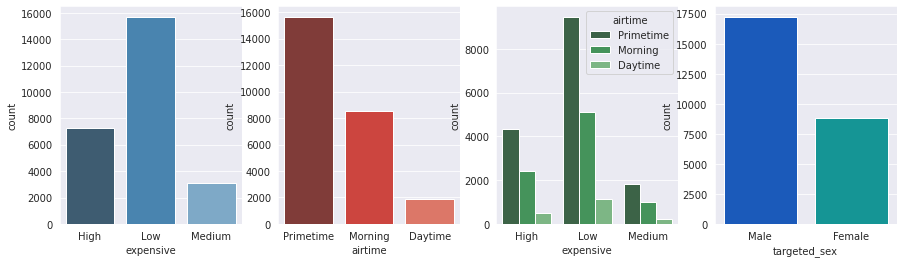

In [464]:
plt.figure(figsize=(15,4))

plt.subplot(141)
sns.countplot(ads.expensive, palette='Blues_d')

plt.subplot(142)
sns.countplot(ads.airtime, palette='Reds_d')

plt.subplot(143)
sns.countplot(ads.expensive, hue=ads.airtime, palette='Greens_d')

plt.subplot(144)
sns.countplot(ads.targeted_sex, palette='winter')
plt.show()

> There are far more 'Low' expenditure ads than any other kind, with the bulk of add spending coming during primetime, regardless of expenditure. Most of these ads also target males.

# Daytime vs. Primetime Advertising
### The sought-out solution:
+ With this experiment, we intend to discover which time of day Pharma Company X should advertisw most heavily. We believe that loading ads during critical hours will increase netgain.

### Rollout Plan:
+ With this experiment we aim to determine whether airing ads in primetime or in the daytime for Pharma Company X results in a higher netgain for the company. This experiment will be conducted over the span of the next four months of late spring and summer. We will run a suite of ads, with of average monthly runtime divided by two, during daytime hours for the first month and the repeat the process for primetime hours during the third month. The netgain will be measured during the month following each advertising period to measure the affects of the ads without having to consider overlapping results. E.g. If an ad typically runs for 40 minutes a month between both primetikme ad daytime, we will reduce its runtime to 20 minutes per month and run it only during the daytikme or primetime, depending of which phase of the experiment we are running.

### Two Versions: 
+ **Primetime** ads and **Daytime** ads. For our purposes, we will combine the 'Morning' and 'Daytime' categories from the `airtime` variable into a single 'Daytime' category.

### Hypothesis:
+ We expect that primetime advertisements will result in a higher netgain than daytime advertisements.
> Null Hypothesis: there is no difference in average netgain between primetime and daytime advertising

### Key metric:
+ netgain

### Secondary metrics:
+ We will check to see how airtime and genre of advertisement are affected.

> In order to approximate this experiment with pre-existing data, we will select our data to reflect a single location (USA), industry (Pharma) and expenditure (Low). The result of these selections will also result in a single ad-targeted gender (Male) by default.

In [467]:
pharma = ads[ads.industry == 'Pharma'][ads.airlocation == 'United-States'].reset_index()
pharma = pharma[pharma.expensive == 'Low']
del pharma['index']
pharma.loc[pharma.airtime == 'Morning', 'airtime'] = 'Daytime'

/home/uzi/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [466]:
pharma.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
1,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True
2,21312,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,High,No,False
3,9457,Married-civ-spouse,Pharma,Comedy,Male,72,Daytime,United-States,0.057643,Low,Yes,False
4,5380,Married-civ-spouse,Pharma,Comedy,Male,56,Daytime,United-States,0.173580,Medium,No,True


In [470]:
# Verifying target gender distribution
pharma.targeted_sex.unique()

array(['Male'], dtype=object)

In [471]:
pharma['average_runtime(minutes_per_week)'].mode()

0    40
dtype: int64

In [474]:
pharma[pharma['average_runtime(minutes_per_week)'] == 40].count()[0]

2628

In [473]:
pharma['average_runtime(minutes_per_week)'].mean()

43.65869218500797

> Since the mean runtime length for an ad is 43.7 minutes, and the mode is 40 (with 2628 observations), for the purposes of this hypothetical experiment we will reduce our dataset to include runtimes of 40 minutes only. We can then use this dataset as a substitute for having captured 20 minutes of monthly daytime and primetime (40 minutes total) advertising during the entire experiment. This will leave us with 2,628 observations with which to run a t-test.

In [476]:
# Confirming observation number
pharma = pharma[pharma['average_runtime(minutes_per_week)'] == 40]
len(pharma)

2628

In [480]:
pharma['is_primetime'] = pd.get_dummies(pharma.airtime, drop_first=True)

In [485]:
pharma.genre.unique()

array(['Comedy', 'Infomercial', 'Direct', 'Drama', 'Other'], dtype=object)

In [487]:
# How large is each group?
print('Primetime sample size:', len(pharma[pharma.is_primetime == 1]))
print('Daytime sample size:', len(pharma[pharma.is_primetime == 0]))
print('Primetime proportion:', pharma.is_primetime.mean())
print()

# What is the netgain of test and control?
print('Primetime mean netgain:', pharma[pharma.is_primetime == 1].netgain.mean())
print('Daytime mean netgain:', pharma[pharma.is_primetime == 0].netgain.mean())

# Are the test and control groups significantly different?
stats.ttest_ind(pharma[pharma.is_primetime == 1].netgain,
                pharma[pharma.is_primetime == 0].netgain)

Primetime sample size: 2065
Daytime sample size: 563
Primetime proportion: 0.7857686453576864

Primetime mean netgain: 0.45084745762711864
Daytime mean netgain: 0.23801065719360567


Ttest_indResult(statistic=9.26264918086803, pvalue=4.023398498534873e-20)

# Results:
>With a p-value < 0.05, we reject our null hypothesis that the difference between the average netgain for primetime and daytime are the same.

# Secondary metrics

In [488]:
pharma.genre.unique()

array(['Comedy', 'Infomercial', 'Direct', 'Drama', 'Other'], dtype=object)

In [491]:
for genre in pharma.genre.unique():
    print(f'Primetime {genre} netgain mean: {pharma[pharma.genre == genre][pharma.is_primetime == 1].netgain.mean()}')
    print(f'Daytime {genre} netgain mean: {pharma[pharma.genre == genre][pharma.is_primetime == 0].netgain.mean()}')
    print('*'*100)

Primetime Comedy netgain mean: 0.4581779435269046
Daytime Comedy netgain mean: 0.229126213592233
****************************************************************************************************
Primetime Infomercial netgain mean: 0.3419354838709677
Daytime Infomercial netgain mean: 0.3225806451612903
****************************************************************************************************
Primetime Direct netgain mean: 0.5333333333333333
Daytime Direct netgain mean: 0.16666666666666666
****************************************************************************************************
Primetime Drama netgain mean: 0.6
Daytime Drama netgain mean: 0.45454545454545453
****************************************************************************************************
Primetime Other netgain mean: 0.3333333333333333
Daytime Other netgain mean: nan
****************************************************************************************************


/home/uzi/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/uzi/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


> In a real world experiment, you probably wouldn't be able to run this experiment with a single genre of commercial, so since we've determined that primetime advertising 'probably' results in a higher net gain than daytime, it might be useful for Pharma Company X to lean heavier towards dramatic commercial and direct commercials than, say, infomercials.